<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Adv_Sales_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data 

In [57]:
adv_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising_sales_prediction.csv')

# EDA

In [58]:
adv_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [59]:
adv_df.shape

(200, 5)

In [60]:
adv_df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [61]:
adv_df = adv_df.drop(columns=['Unnamed: 0'])

In [ ]:
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [63]:
adv_df.isnull().values.any()

False

In [64]:
X = adv_df[['TV', 'Radio', 'Newspaper']]

In [65]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [66]:
y = adv_df['Sales']

In [67]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [68]:
X.shape

(200, 3)

In [69]:
y.shape

(200,)

# Selecting the model

In [70]:
from sklearn.linear_model import LinearRegression

In [76]:
linReg = LinearRegression()

# Data Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Train the Model

In [80]:
linReg.fit(x_train,y_train)

LinearRegression()

In [81]:
print(linReg.intercept_)

3.2903522523678443


In [82]:
print(linReg.coef_)

[ 0.0443126   0.19620019 -0.00648695]


# Making Predictions

In [83]:
y_pred = linReg.predict(x_test)

In [84]:
y_pred

array([19.31602861, 16.55058705, 18.21606496,  8.715994  , 15.71396664,
       11.33290239, 14.08199058, 19.13431259,  8.82064034, 20.8042638 ,
       18.49114066, 18.12201859, 20.08591271, 13.06690339, 15.33209587,
        9.05524629, 10.93993809, 19.32927169,  9.49845252,  8.16674526,
       17.92663042,  9.93970241, 12.68036888, 18.66693723, 17.16521274,
       10.2046449 ,  5.71098047, 14.82130707, 14.48156641, 12.80390394,
       13.14337286,  7.20039209, 16.3833663 , 13.34859241, 15.99633917,
       11.32055671, 10.39912904, 11.034462  , 20.47869559, 13.85439428,
       22.89214684, 12.0162335 ,  9.82180807, 15.69045677, 22.64546934,
        8.05403088,  5.6195144 , 13.72757645, 23.16747391, 17.70762608])

In [85]:
print('Actual Values', y_test.values[0:10])

Actual Values [19.7 15.9 16.1  9.9 14.6 11.9 14.1 18.9 10.4 22.6]


In [86]:
print('predicted value', y_pred[0:10])

predicted value [19.31602861 16.55058705 18.21606496  8.715994   15.71396664 11.33290239
 14.08199058 19.13431259  8.82064034 20.8042638 ]


# Measuring the Model Predictive Accuracy

In [87]:
from sklearn import metrics

In [88]:
mse = metrics.mean_squared_error(y_test,y_pred)

In [89]:
mse

4.444386726258119

In [90]:
np.sqrt(mse)

2.1081714176646353

In [91]:
r2 = metrics.r2_score(y_test,y_pred)

In [92]:
r2 

0.8365597089038186

In [93]:
y_test.head(10)

124    19.7
113    15.9
150    16.1
191     9.9
114    14.6
164    11.9
112    14.1
68     18.9
143    10.4
52     22.6
Name: Sales, dtype: float64

In [94]:
y_pred[0:10]

array([19.31602861, 16.55058705, 18.21606496,  8.715994  , 15.71396664,
       11.33290239, 14.08199058, 19.13431259,  8.82064034, 20.8042638 ])

# Plotting Actual vs. Predicted

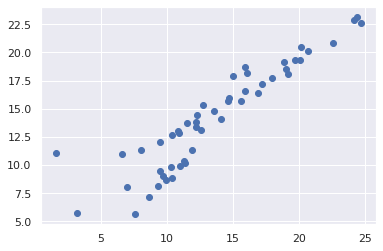

In [95]:
plt.scatter(y_test,y_pred)

In [96]:
adv_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


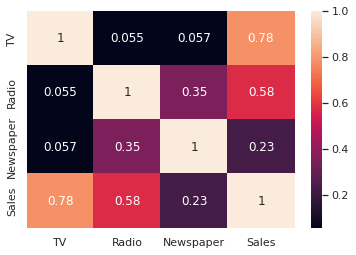

In [97]:
sns.heatmap(adv_df.corr(),annot=True)